## *Basit Lineer Regresyon Kullanılarak İkinci El Araç Fiyatlarının Tahmini*

In [23]:
# Öncelikle gerekli kütüphanelerin import edilmesi işlemini gerçekleştirelim
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Sentetik Training Dataset oluşturalım
# X : Araçların KM değerleri
# y : Araçların fiyat değerleri

X = np.array([[6000], [8200], [9000], [14200], [16200], [20000], [27800], [30180]]).reshape(-1, 1)
y = [86000, 82000, 78000, 75000, 70000, 65000, 58000, 55000]

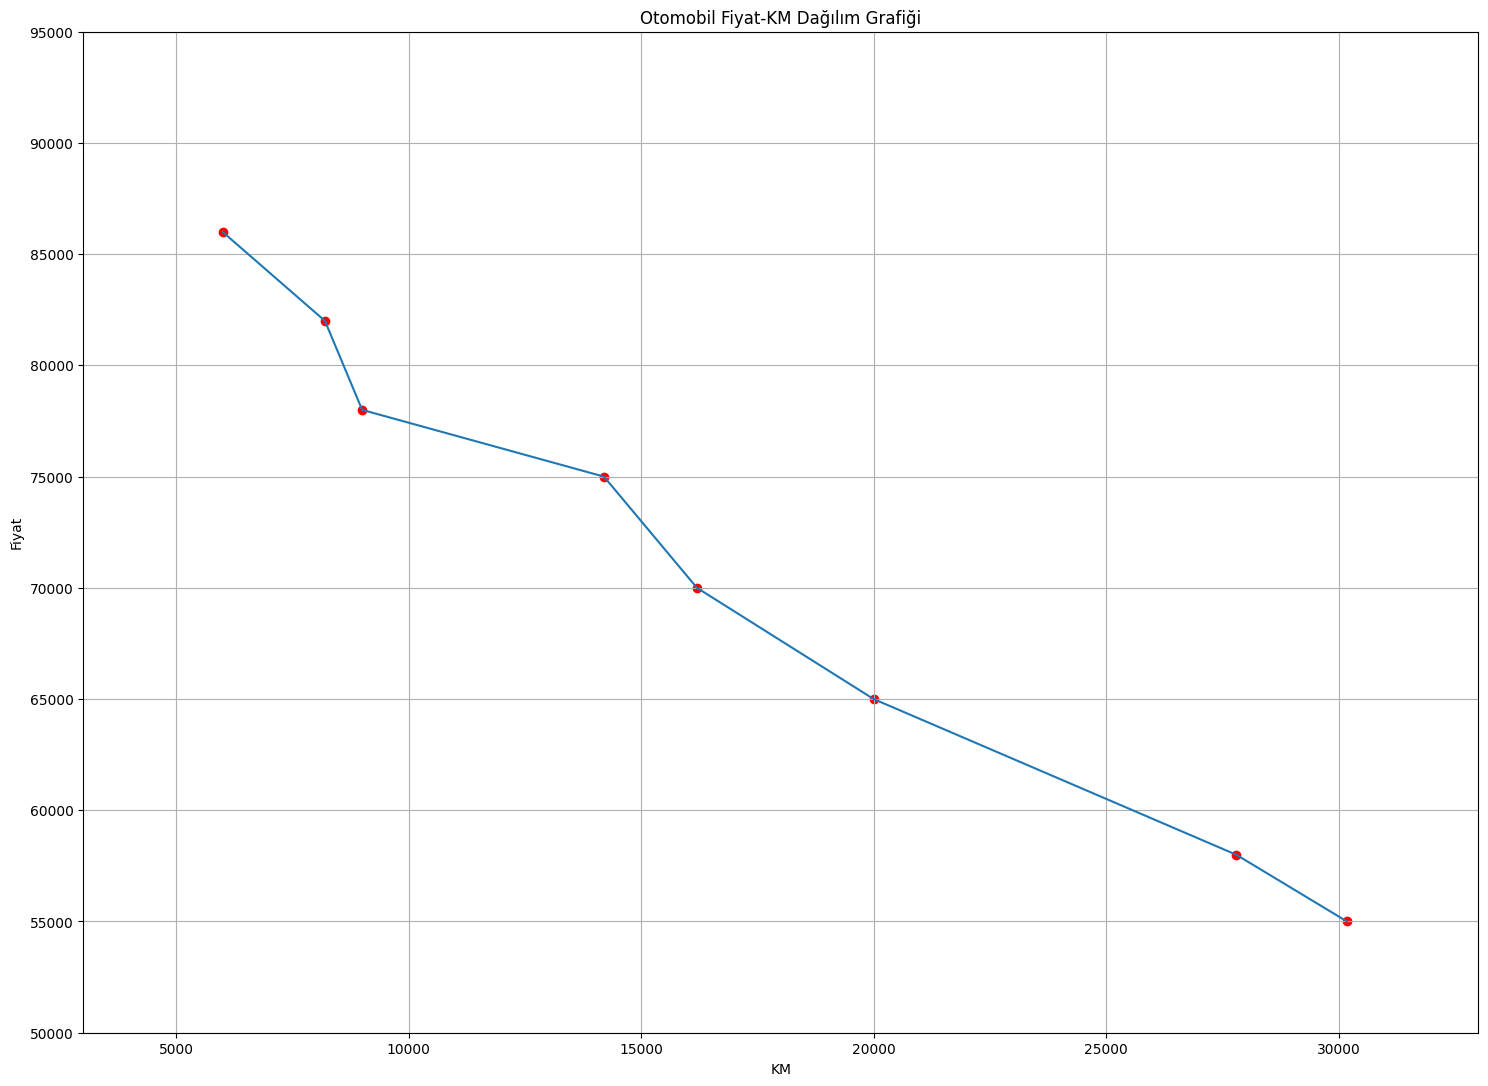

In [25]:
# Train Dataset'i görselleştirelim

plt.figure(figsize=(18,13))
plt.title("Otomobil Fiyat-KM Dağılım Grafiği")
plt.xlabel("KM")
plt.ylabel("Fiyat")
plt.scatter(X, y, color="red")
plt.plot(X, y)
plt.axis([3000, 33000, 50000, 95000]) # x_min, x_max, y_min, y_max
plt.grid(True)
plt.show()

In [26]:
# Basit Lineer Regresyon modelini oluşturmak için "sklearn" kütüphanesinin "LinearRegression" metodunu import edelim
# Bu metoda X ve y değerlerini parametre olarak verip modelimizi eğitelim

from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()
linearReg.fit(X, y)

LinearRegression()

In [27]:
# Eğittiğimiz modelin parametrelerini inceleyelim
# intercept_ : Regresyon eğrisinin y ekseninin kesim parametresi
# coef_ : Regresyon eğrisinin eğim paratmetresi, özniteliğin hedef değişken üzerindeki etkisini açıklayan katsayı

linearRegIntercept = linearReg.intercept_
linearRegCoefficient = linearReg.coef_

print(f"Linear Regression Model Intercept: {linearRegIntercept}")
print(f"Linear Regression Model Coefficient: {linearRegCoefficient}")

Linear Regression Model Intercept: 91311.86577117619
Linear Regression Model Coefficient: [-1.22735162]


In [28]:
# Modelimizin tahmin değerlerini oluşturalım
# Tahmin değerlerini oluştururken X serisini kullanacağız
# Normale yeni veri bulmamız ya da üretmemiz gerekir ancak şimdilik algoritmayı anlamak için X kullanıyoruz
y_pred = linearReg.predict(X)

In [29]:
# Tahmin değerlerini inceleyelim
print(y_pred)

[83947.75605073 81247.58248656 80265.70119051 73883.47276612
 71428.76952597 66764.83336969 57191.4907331  54270.39387733]


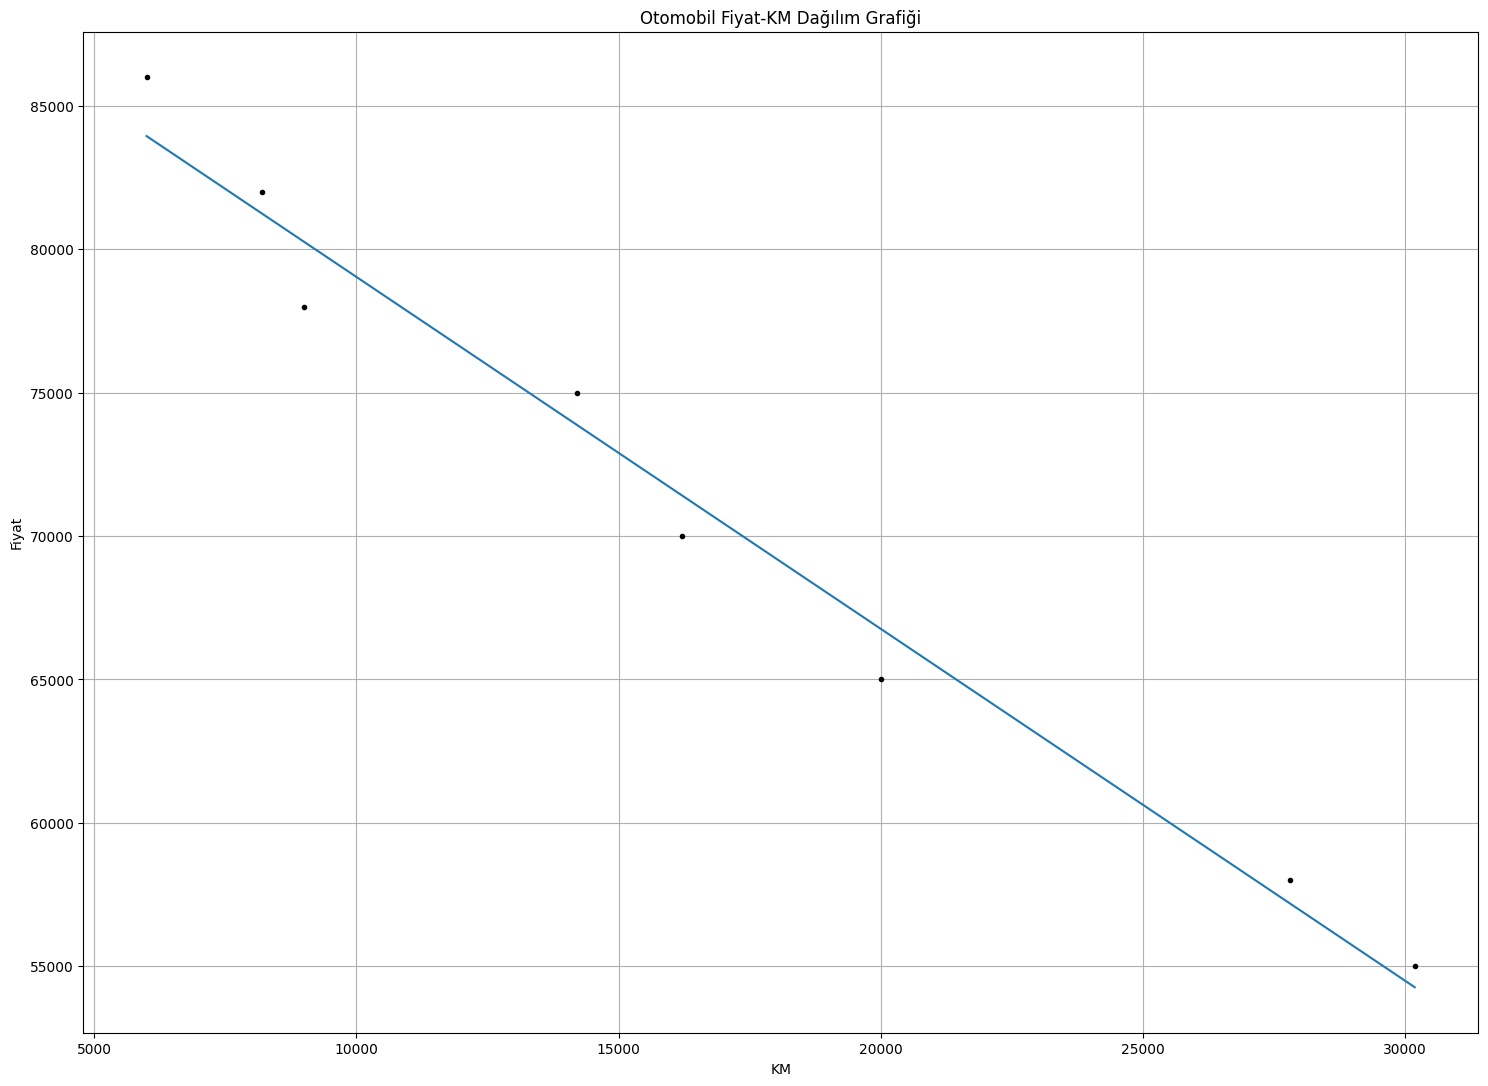

In [31]:
# Modelimizin tahmin doğrusunu oluşturalım

plt.figure(figsize=(18,13))
plt.title("Otomobil Fiyat-KM Dağılım Grafiği")
plt.xlabel("KM")
plt.ylabel("Fiyat")
plt.plot(X, y_pred)             # Tahmin Doğrusu
plt.plot(X, y, 'k.')  # Gerçek Veriler
plt.grid(True)
plt.show()

In [32]:
# 15000 KM değerine sahip olan bir aracın fiyatını tahmin edelim

car_price = np.array([[15000]])
price_prediction = linearReg.predict(car_price)[0]

print(f"Price prediction of 15000 KM car: {price_prediction} $")

Price prediction of 15000 KM car: 72901.59147005792 $


In [33]:
# 12000 KM değerine sahip olan bir aracın fiyatını tahmin edelim

car_price = np.array([[12000]])
price_prediction = linearReg.predict(car_price)[0]

print(f"Price prediction of 12000 KM car: {price_prediction} $")

Price prediction of 12000 KM car: 76583.64633028157 $


In [34]:
# 9000 KM değerine sahip olan bir aracın fiyatını tahmin edelim

car_price = np.array([[9000]])
price_prediction = linearReg.predict(car_price)[0]

print(f"Price prediction of 9000 KM car: {price_prediction} $")

Price prediction of 9000 KM car: 80265.70119050522 $


In [35]:
y_pred

array([83947.75605073, 81247.58248656, 80265.70119051, 73883.47276612,
       71428.76952597, 66764.83336969, 57191.4907331 , 54270.39387733])

In [36]:
for i, prediction in enumerate(y_pred):
    print(f"Predicted Price: {prediction}$   \t\tReal Price: {y[i]}$")

Predicted Price: 83947.75605072889$   		Real Price: 86000$
Predicted Price: 81247.58248656486$   		Real Price: 82000$
Predicted Price: 80265.70119050522$   		Real Price: 78000$
Predicted Price: 73883.47276611756$   		Real Price: 75000$
Predicted Price: 71428.76952596846$   		Real Price: 70000$
Predicted Price: 66764.83336968516$   		Real Price: 65000$
Predicted Price: 57191.49073310365$   		Real Price: 58000$
Predicted Price: 54270.39387732622$   		Real Price: 55000$


In [37]:
# Regresyon modelimizin değerlendirme ölçümlerini gerçekleştirelim.
# Tahmin değerlerinin doğruluk oranını inceleyelim.
# Bunun için "sklearn" kütüphanesinin "metrics" özelliğini kullanacağız.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r_square_score = r2_score(y, y_pred)

In [38]:
print(f"Mean Absolute Error of the Regression Model: {mae}")
print(f"Mean Square Error of the Regression Model: {mse}")
print(f"R-Square Score of Linear Regression Model : {r_square_score}")

Mean Absolute Error of the Regression Model: 1364.8260215397077
Mean Square Error of the Regression Model: 2187487.975061564
R-Square Score of Linear Regression Model : 0.9799514205350222


In [39]:
# sklearn kütüphanesinde RMSE değerini hesapayabileceğimiz bir metot yok.
# Bu nedenle kendimiz hesaplayacağız.

from math import sqrt

root_mean_square_error = sqrt(mse)
print(f"Root Mean Square Error Score of Linear Regression Model : {root_mean_square_error}")

Root Mean Square Error Score of Linear Regression Model : 1479.0158805981644


In [40]:
# Model test veri seti üzerinde ne kadar başarılı?
# Bu sorunun cevabını bulmak için küçük bir veri seti oluşturacağız.
# X_test : 10 yeni aracın KM değerleri
# y_test : Araçların satış fiyatları

X_test = np.array([[1700], [2600], [11000], [14000], [17500], [20000], [27800], [30180]]).reshape(-1, 1)
y_test = [94000, 94400, 73000, 83000, 75000, 72000, 65000, 61000]

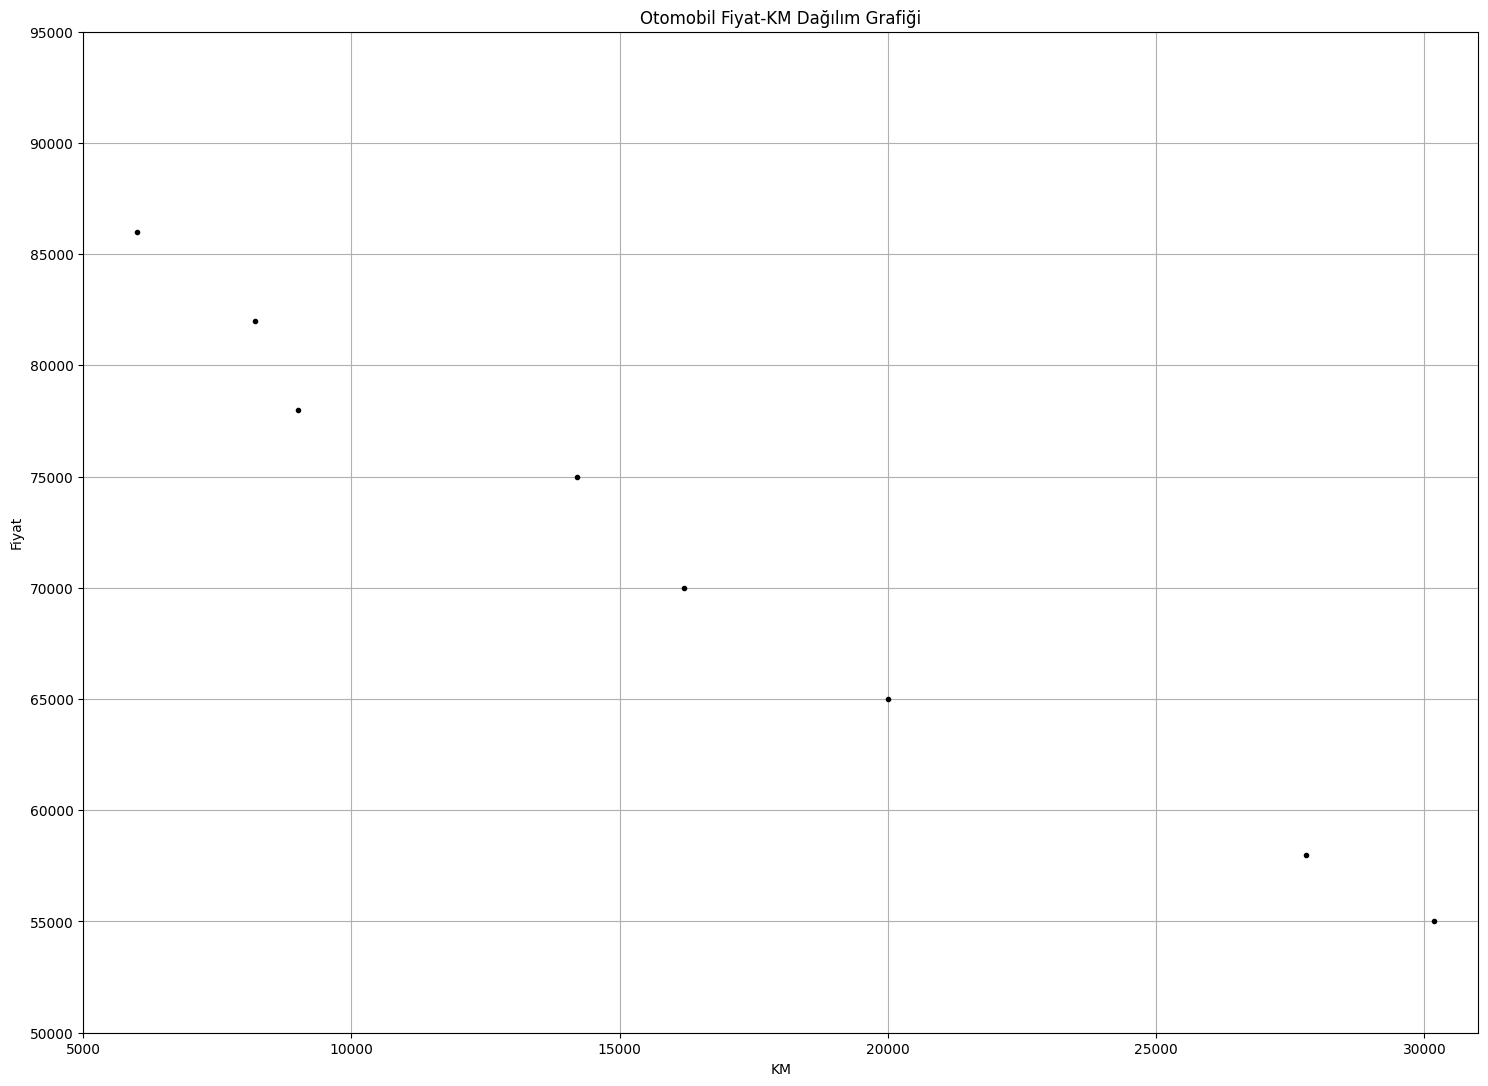

In [47]:
# 1. Grafik: Eğitim Veri Seti Grafiği

plt.figure(figsize=(18,13))
plt.title("Otomobil Fiyat-KM Dağılım Grafiği")
plt.xlabel("KM")
plt.ylabel("Fiyat")
plt.plot(X, y, 'k.')
plt.axis([5000, 31000, 50000, 95000]) # x_min, x_max, y_min, y_max
plt.grid(True)
plt.show()

C:\Users\halim\AppData\Local\Temp\ipykernel_22312\2959596706.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(X, y, 'k.', color='blue')


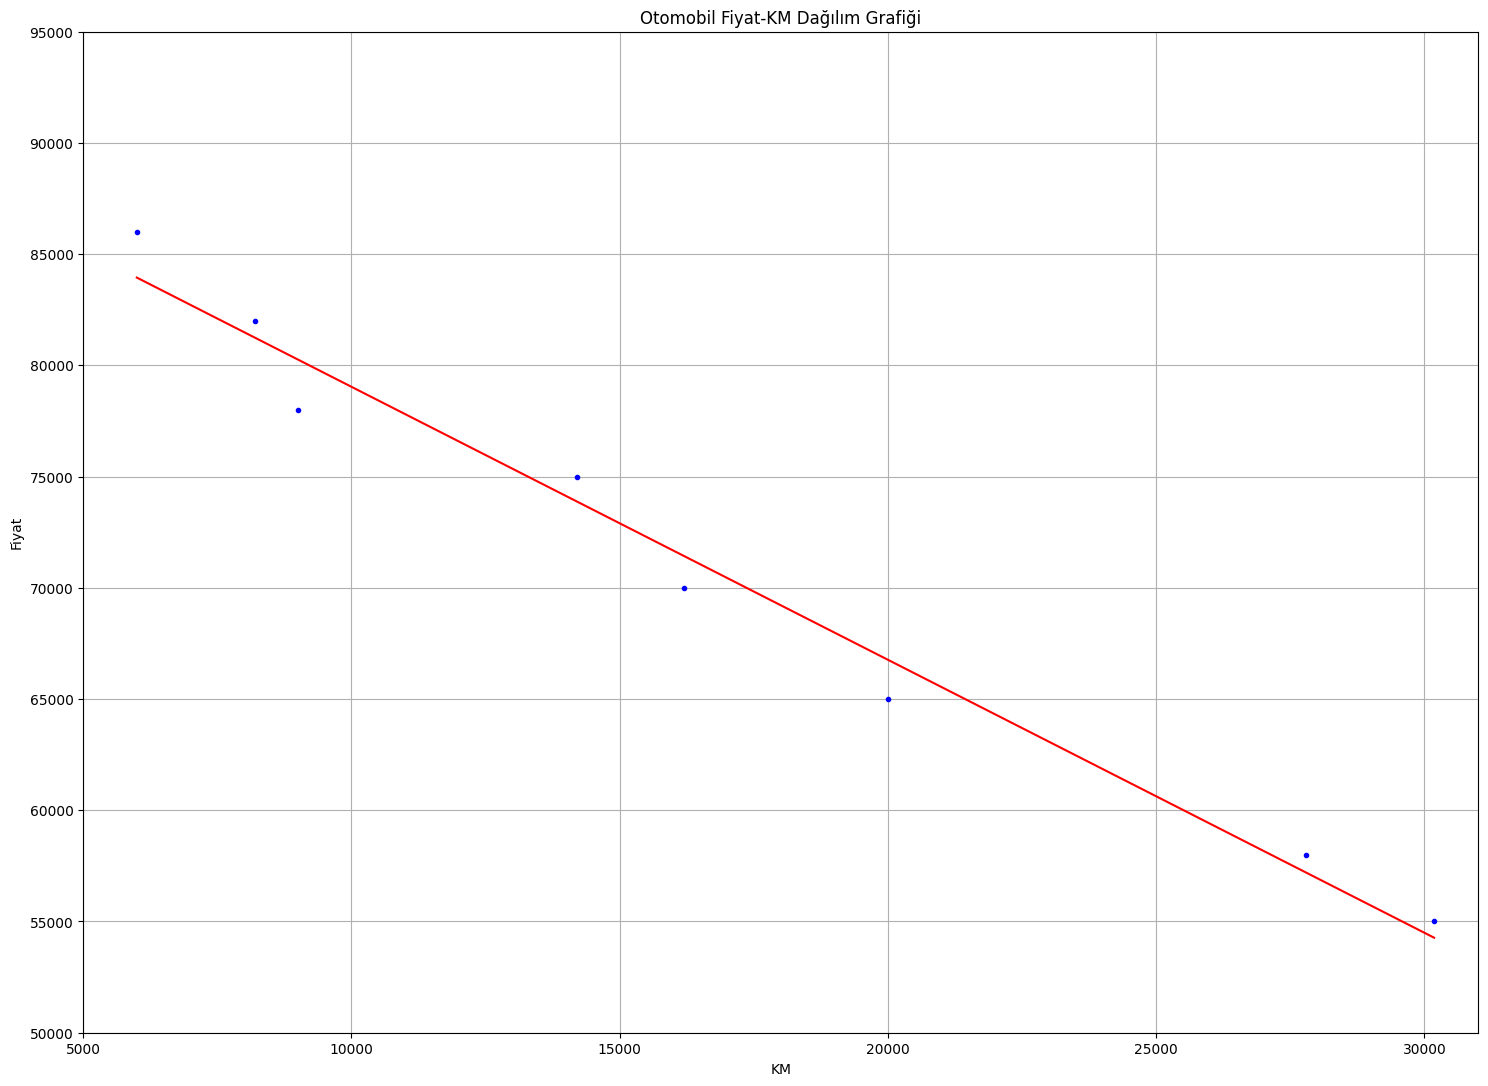

In [60]:
# 2. Grafik: Eğitim Veri Seti ve Tahmin Doğruluğu Grafiği

plt.figure(figsize=(18,13))
plt.title("Otomobil Fiyat-KM Dağılım Grafiği")
plt.xlabel("KM")
plt.ylabel("Fiyat")
plt.plot(X, y_pred, color="red")
plt.plot(X, y, 'k.', color='blue')
plt.axis([5000, 31000, 50000, 95000]) # x_min, x_max, y_min, y_max
plt.grid(True)
plt.show()

C:\Users\halim\AppData\Local\Temp\ipykernel_22312\852067461.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(X, y, 'k.', color = "red")


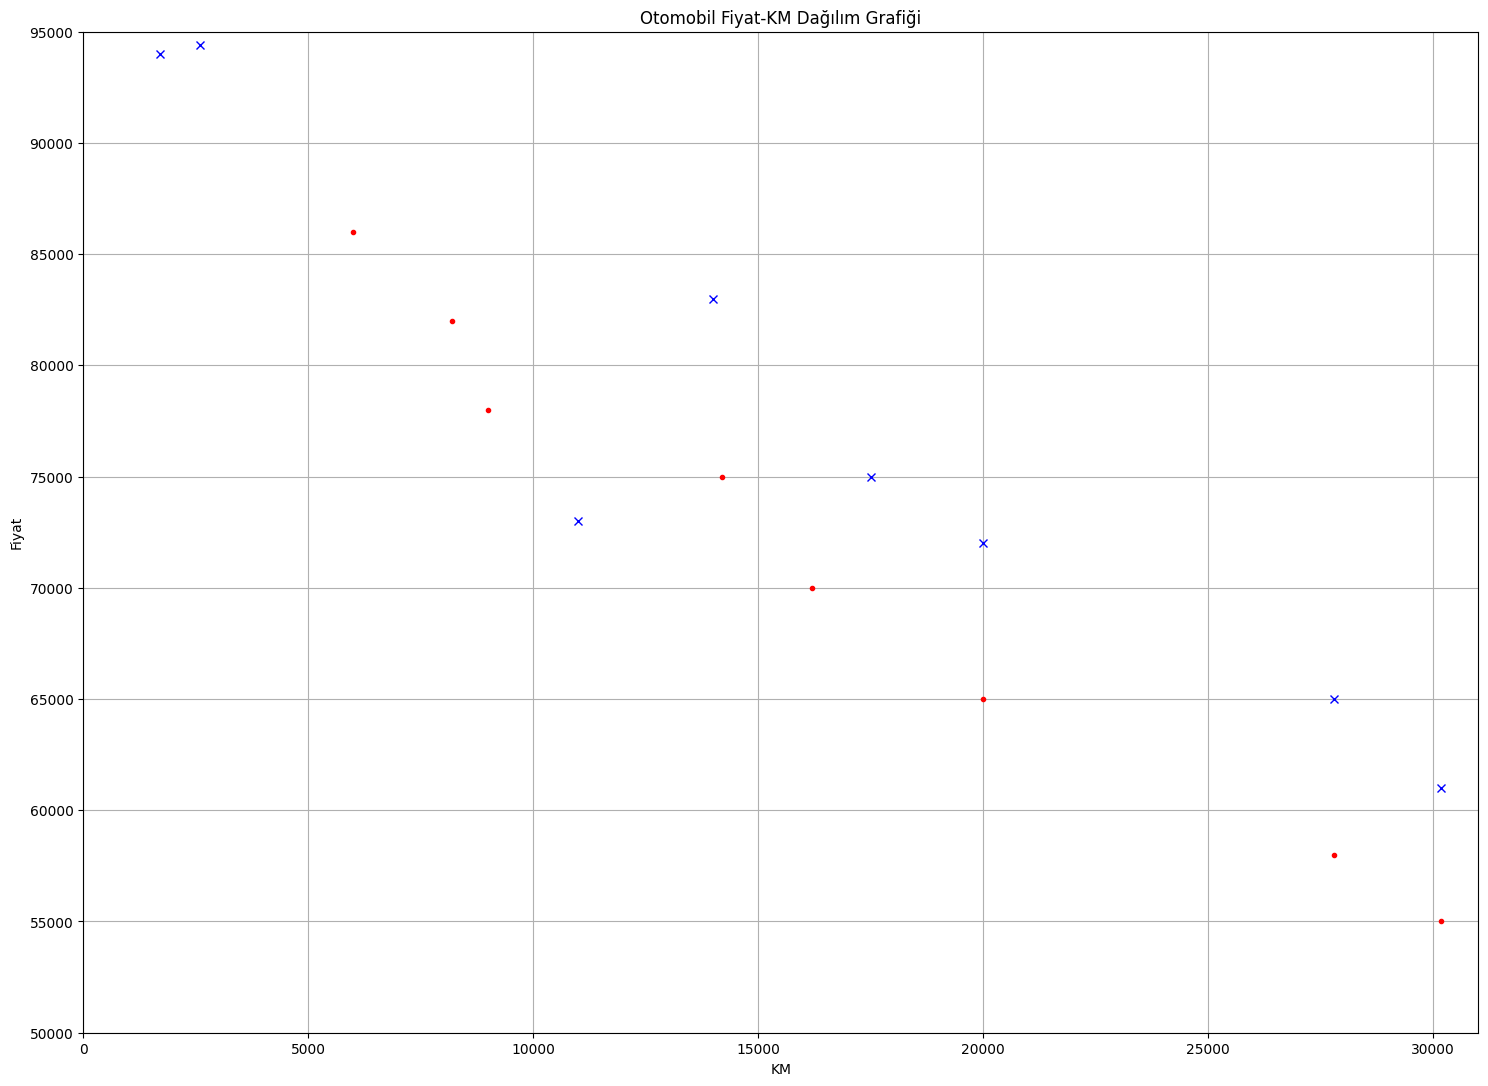

In [58]:
# 3. Grafik: Eğitim Veri Seti ve Test Veri Seti Grafiği

plt.figure(figsize=(18,13))
plt.title("Otomobil Fiyat-KM Dağılım Grafiği")
plt.xlabel("KM")
plt.ylabel("Fiyat")
plt.plot(X, y, 'k.', color = "red")
plt.plot(X_test, y_test, 'x', color="blue")
plt.axis([0, 31000, 50000, 95000]) # x_min, x_max, y_min, y_max
plt.grid(True)
plt.show()

C:\Users\halim\AppData\Local\Temp\ipykernel_22312\3952668788.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(X, y, 'k.', color = "blue")


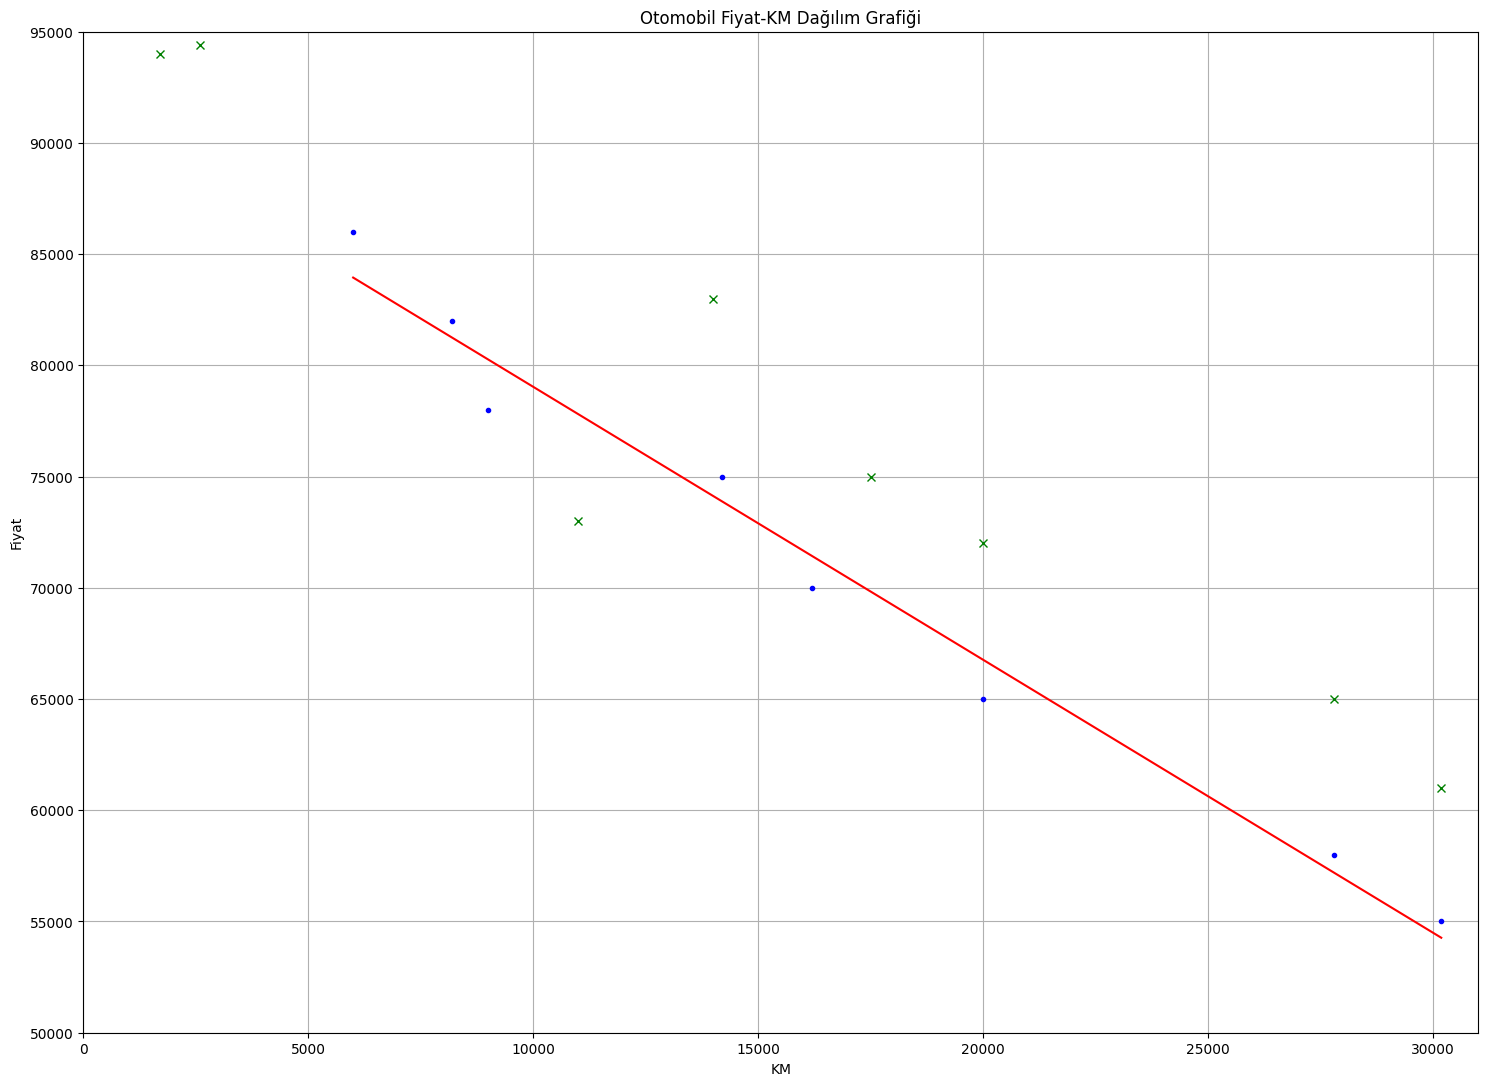

In [57]:
# 4. Grafik: Eğitim Veri Seti ve Test Veri Seti ile Eğitim Veri Setinin Tahmini Doğruluğu Grafiği

plt.figure(figsize=(18,13))
plt.title("Otomobil Fiyat-KM Dağılım Grafiği")
plt.xlabel("KM")
plt.ylabel("Fiyat")
plt.plot(X, y_pred, color = "red")
plt.plot(X, y, 'k.', color = "blue")
plt.plot(X_test, y_test, 'x', color="green")
plt.axis([0, 31000, 50000, 95000]) # x_min, x_max, y_min, y_max
plt.grid(True)
plt.show()

C:\Users\halim\AppData\Local\Temp\ipykernel_22312\4159642327.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(X, y, 'k.', color = "blue")


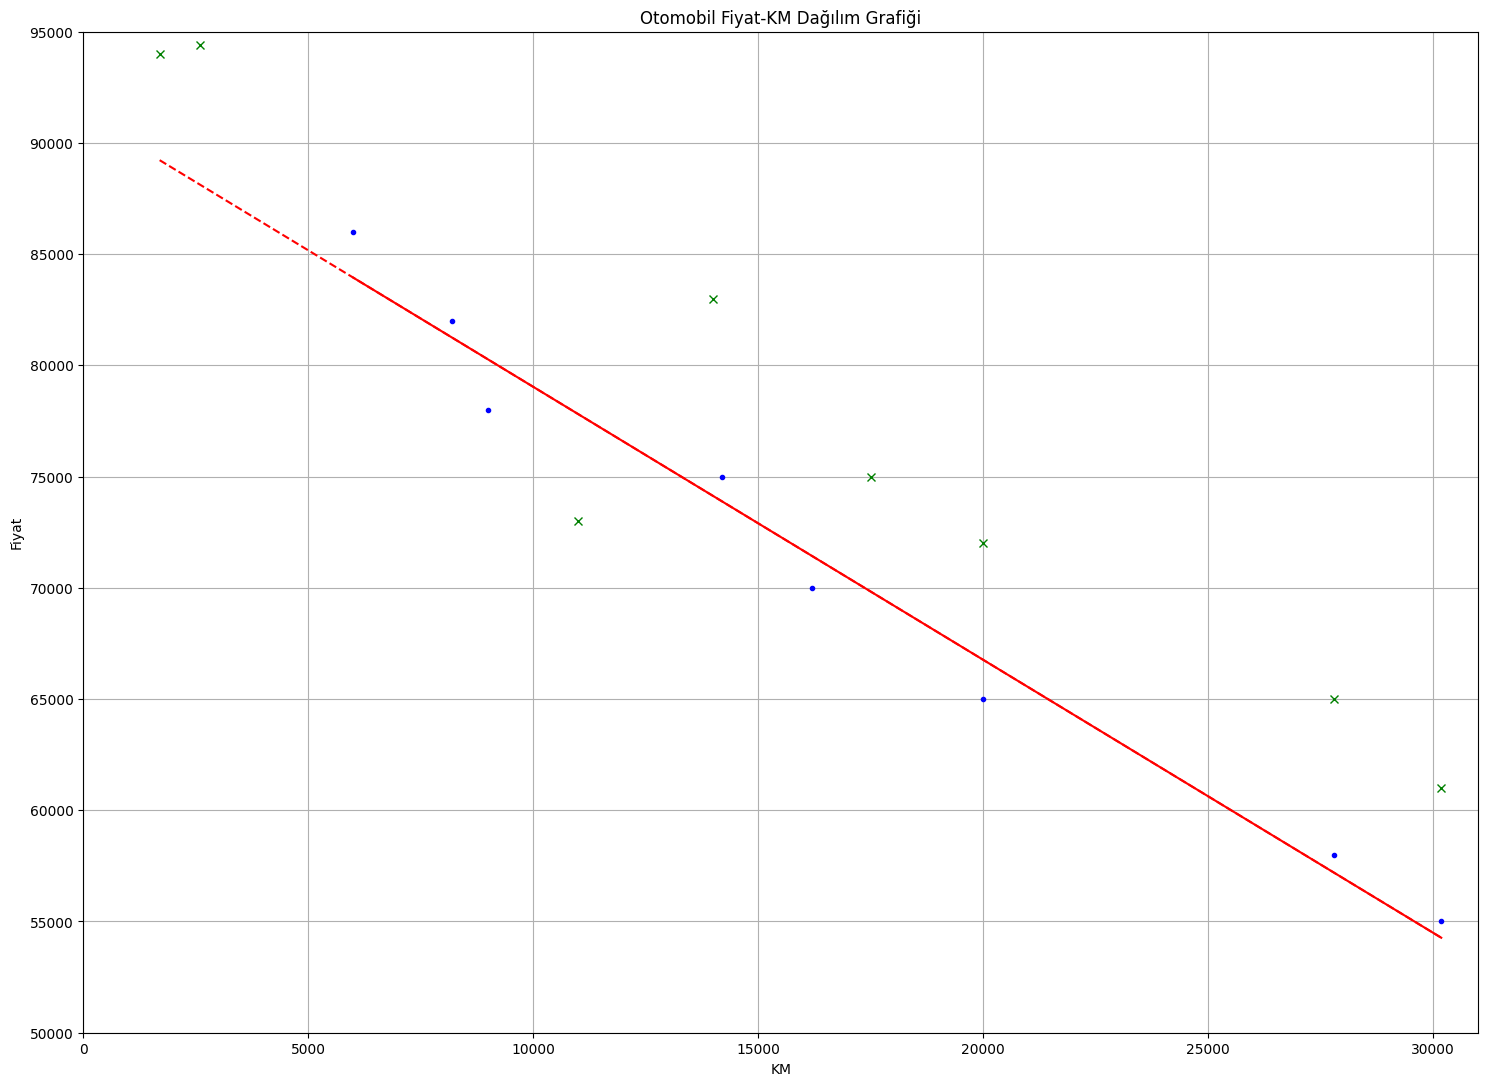

In [62]:
# 5. Grafik: Tahmin Doğrusu, Test Veri Seti üzerinde başarılı mı?

plt.figure(figsize=(18,13))
plt.title("Otomobil Fiyat-KM Dağılım Grafiği")
plt.xlabel("KM")
plt.ylabel("Fiyat")
plt.plot(X, y_pred, color = "red")
plt.plot(X_test, linearReg.predict(X_test), '--', color = "red")
plt.plot(X, y, 'k.', color = "blue")
plt.plot(X_test, y_test, 'x', color="green")
plt.axis([0, 31000, 50000, 95000]) # x_min, x_max, y_min, y_max
plt.grid(True)
plt.show()

In [63]:
y_test_pred = linearReg.predict(X_test)

In [65]:
for i, prediction in enumerate(y_test_pred):
    print(f"Predicted Price: {prediction}$   \t\tReal Price: {y[i]}$")

Predicted Price: 89225.36801704945$   		Real Price: 86000$
Predicted Price: 88120.75155898236$   		Real Price: 82000$
Predicted Price: 77810.99795035612$   		Real Price: 78000$
Predicted Price: 74128.94309013247$   		Real Price: 75000$
Predicted Price: 69833.21241987153$   		Real Price: 70000$
Predicted Price: 66764.83336968516$   		Real Price: 65000$
Predicted Price: 57191.49073310365$   		Real Price: 58000$
Predicted Price: 54270.39387732622$   		Real Price: 55000$


In [67]:
# Regresyon modelimizin değerlendirme ölçümlerini gerçekleştirelim.
# Tahmin değerlerinin doğruluk oranını inceleyelim.

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r_square_score = r2_score(y_test, y_test_pred)

In [68]:
print(f"Mean Absolute Error of the Regression Model: {mae}")
print(f"Mean Square Error of the Regression Model: {mse}")
print(f"R-Square Score of Linear Regression Model : {r_square_score}")

Mean Absolute Error of the Regression Model: 6209.50061052566
Mean Square Error of the Regression Model: 40553812.82699281
R-Square Score of Linear Regression Model : 0.6975049275619059


In [69]:
# sklearn kütüphanesinde RMSE değerini hesapayabileceğimiz bir metot yok.
# Bu nedenle kendimiz hesaplayacağız.

from math import sqrt

root_mean_square_error = sqrt(mse)
print(f"Root Mean Square Error Score of Linear Regression Model : {root_mean_square_error}")

Root Mean Square Error Score of Linear Regression Model : 6368.187562171266
